# Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pylab
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,f1_score

# Read the dataset

In [2]:
df= pd.read_excel('Microchiptest.xlsx', sheet_name='Sheet1')   
#df1 = pd.get_dummies(df1, columns=["Employment.Type"])
#df1 = pd.get_dummies(df1, columns=["PERFORM_CNS.SCORE.DESCRIPTION"])
df.head()

,Microchiptest1,Microchiptest2,classlabel
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


# Plot the correlation

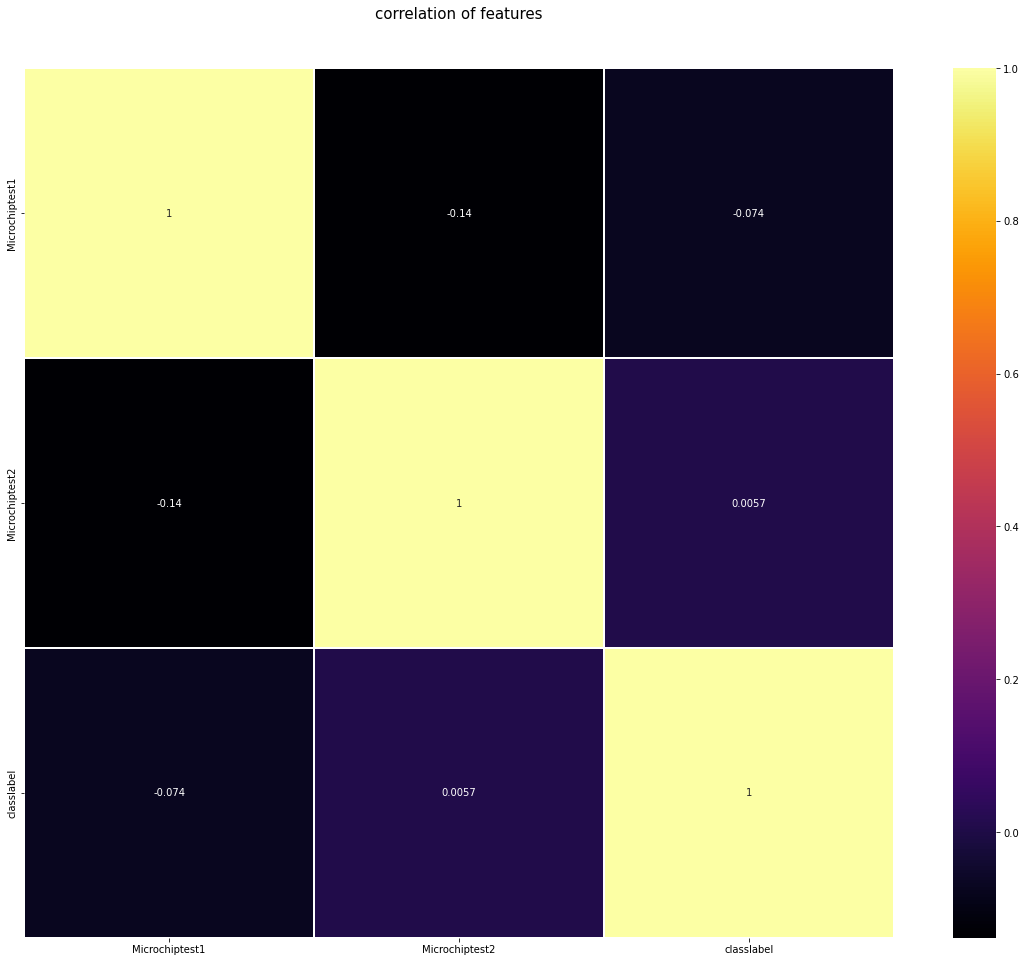

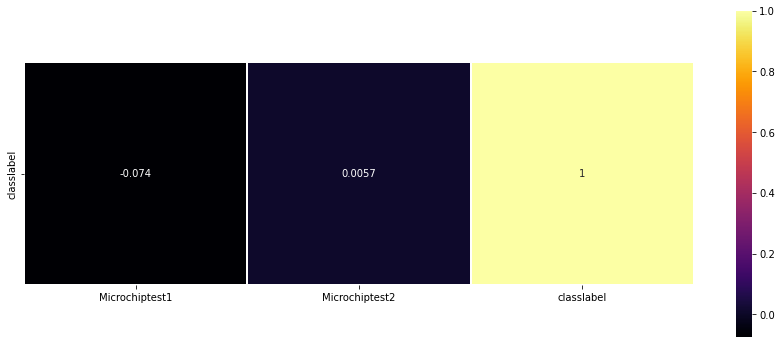

In [3]:
colormap = plt.cm.inferno
plt.figure(figsize=(21,16))
plt.title('correlation of features', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()
plt.figure(figsize=(15,6))
corr = df.corr()
sns.heatmap(corr[corr.index == 'classlabel'], linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);
plt.show()


# Prepare feature matrix and target vector

In [4]:
X = df.drop('classlabel', axis = 1)
y = df['classlabel']

# Normalization or Standardization

In [5]:

#dataset1 = X.values.astype('float64')
# Scale the data
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
#X = scaler.fit_transform(dataset1)


# Split the Dataset in training and test set (80% Training Set, 20% Test Set)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(94, 2)
(24, 2)
(94,)
(24,)


# Select model for training

In [7]:
lr = SVC(C=10000)

# Train the selected model

In [8]:
lr.fit(X_train,Y_train)

SVC(C=10000)

# Predict by using trained model

In [9]:
Y_pred = lr.predict(X_test)

# Check the performance of model

In [10]:
f1_score(Y_test,Y_pred)

0.8148148148148148

In [11]:
print(confusion_matrix(Y_test,Y_pred,labels=[0,1]))

[[ 8  4]
 [ 1 11]]


In [12]:
print(classification_report(Y_test,Y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.92      0.81        12

    accuracy                           0.79        24
   macro avg       0.81      0.79      0.79        24
weighted avg       0.81      0.79      0.79        24



# Check the performance of different algorithms

LR: 0.481111 (0.106927)
LDA: 0.492222 (0.096231)
KNN: 0.714444 (0.129772)
CART: 0.735556 (0.117252)
NB: 0.636667 (0.163907)
SVM: 0.713333 (0.125885)


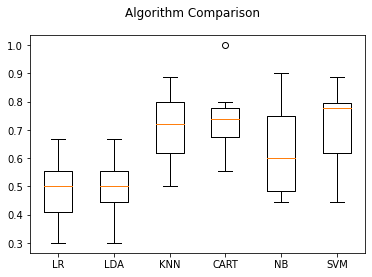

In [13]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()    

LR: 0.411688 (0.175272)
LDA: 0.433227 (0.190767)
KNN: 0.653520 (0.191729)
CART: 0.708368 (0.187328)
NB: 0.615967 (0.191536)
SVM: 0.650159 (0.159389)


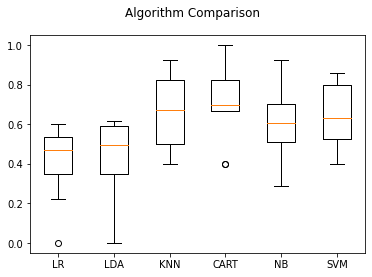

In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()    